## First, import the wildfire dataset. 



In [6]:
library(readr)
wildfires <- read_delim("california_wildfires_size_2024.txt", 
    delim = "\t", escape_double = FALSE, 
    trim_ws = TRUE, show_col_types = FALSE)


## The first plot I made was a bar graph showing the total number of acres burned for each month of the year. I grouped the data by month and made sure to plot the months in the x-axis by labelling them in numerical order. I also changed the labels on the y-axis to be scaled in the millions to avoid showing the labels in scientific notation.  



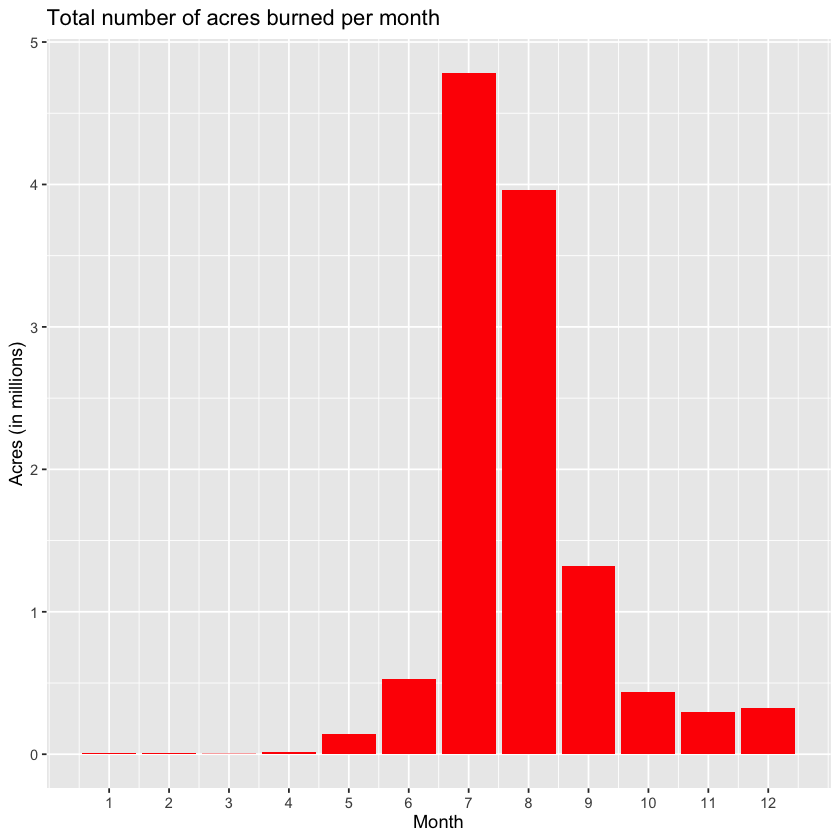

In [7]:
library(tidyverse)
#group by month, summarize by sum
by_month <- wildfires %>%
  group_by(Month) %>%
  summarize(acres_burned = sum(AcresBurned/1000000, na.rm = TRUE))
plot <- ggplot(data = by_month, mapping = aes(x = Month, y = acres_burned))
plot + geom_bar(stat = "identity", fill = "red") + scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)) + labs(title = "Total number of acres burned per month", x = "Month", y = "Acres (in millions)")


#### Description of this graph that I wrote for the week five homework: This is a bar graph depicting the total number of acres burned in the dataset for each month of the year. The months are labelled numerically on the x-axis, and the acres burned are on the y-axis, scaled by millions. The graph shows that wildfires in July and August had the greatest number of acres burned, with July having almost 5 million acres burned and August having almost 4 million acres burned. Besides September, the rest of the months of the year about or less than 0.5 million acres burned. Therefore, it can be concluded that the most destructive wildfires in California tend to occur in July and August because these months have the greatest number of acres burned by a significant magnitude when compared to the rest of the year.  


## Graph From activity 4 of week 6 homework. 


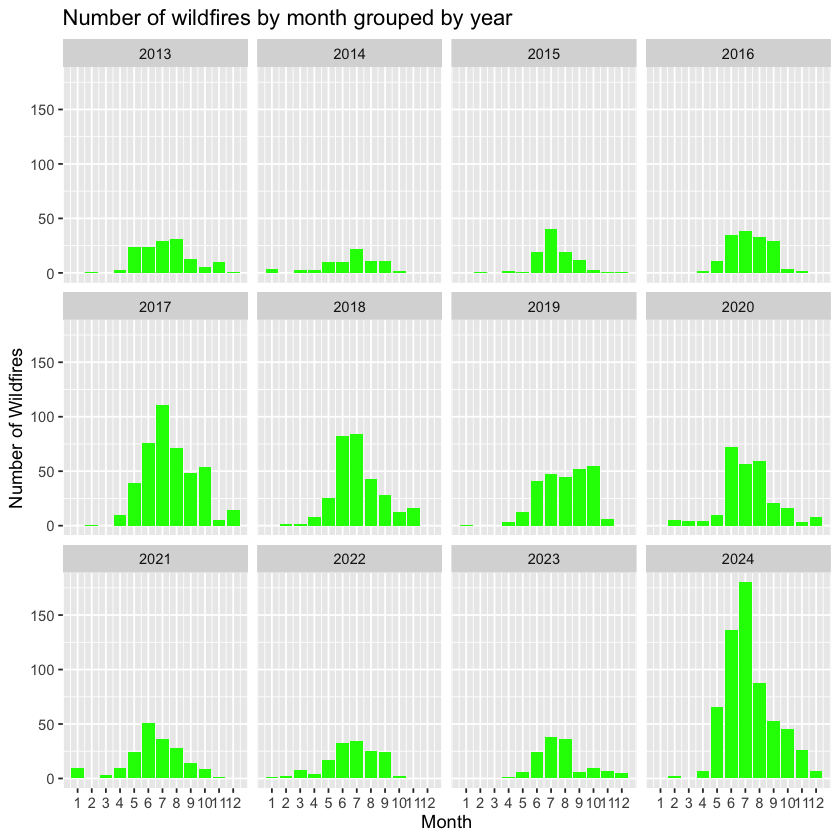

In [8]:
#group by year and month, summarize the count of rows
by_year <- wildfires %>%
  group_by(Year, Month) %>%
  summarize(FireCount = n(), .groups = "drop")

p <- ggplot(data = by_year, mapping = aes(x = Month, y = FireCount))
p + geom_bar(stat = "identity", fill = "green") + scale_x_continuous(breaks = c(1,2,3,4,5,6,7,8,9,10,11,12)) + facet_wrap(~Year) + labs(y="Number of Wildfires", title = "Number of wildfires by month grouped by year")


#### Description from homework: The previous graph showed the number of wildfires by month. This graph groups the data by year to show the number of wildfires per month per year. This is a graph of the total number of acres burned in the dataset grouped by year and month. There is a separate bar graph per year, with each bar in the graph representing one month. Similar to the graph above, the months are labelled numerically on the x-axis, and the acres burned are on the y-axis, scaled by millions. This graph is different from the one above, because it also shows which years had the greatest number of acres burned. Relative to the rest of the years, 2020 and 2021 had the greatest number of acres burned in the summer months. 

## For the week 9 homework, I gathered 3 datasets about weather conditions from LA, Riverside, and San Diego.   

## Code for merging the LA and wildfire dataset. 


In [9]:
la_weather <- read_csv("Los_Angeles_PRISM_ppt_tmean_provisional_4km_201301_202412_34.3231_-118.2249.csv", 
    skip = 10, show_col_types = FALSE)

#filter by wildfires in la, group by year and month, sum the count
la_fires <- wildfires %>%
  filter(County == "Los Angeles") %>%
  group_by(Year, Month) %>%
  summarize(fires = n())

#created year and month columns in weather data set to make it easier to merge
la_weather$Year <- as.integer(substr(la_weather$Date, 1, 4))
la_weather$Month <- as.integer(substr(la_weather$Date, 6, 7))

#merge and rename columns
merged_data_la <- merge(la_fires, la_weather, by = c("Year", "Month"))
merged_data_la <- setNames(merged_data_la, c("Year", "Month", "Fires_Count", "Date", "Precipitation_Inches", "Avg_Temperature"))
merged_data_la <- merged_data_la %>%
  mutate(Date = as.Date(paste0(Date, "-01")))
print(merged_data_la)


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


   Year Month Fires_Count       Date Precipitation_Inches Avg_Temperature
1  2013     5           3 2013-05-01                 1.72            60.8
2  2013     9           1 2013-09-01                 0.00            71.0
3  2014     1           1 2014-01-01                 0.08            54.4
4  2014     8           2 2014-08-01                 0.05            73.0
5  2015     6           1 2015-06-01                 0.04            71.7
6  2015     7           1 2015-07-01                 2.17            70.4
7  2016    11           1 2016-11-01                 1.60            55.1
8  2016     4           1 2016-04-01                 0.96            55.4
9  2016     5           1 2016-05-01                 0.34            55.5
10 2016     7           1 2016-07-01                 0.00            76.1
11 2017    10           1 2017-10-01                 0.02            65.3
12 2017    12           3 2017-12-01                 0.00            52.2
13 2017     6           5 2017-06-01  

## Repeat the same process to merge Riverside and wildfire dataset. 



In [10]:
riverside_weather <- read_csv("Riverside_PRISM_ppt_tmean_provisional_4km_201301_202412_33.7437_-115.9938.csv", 
    skip = 10, show_col_types = FALSE)

#filter wildfires in Riverside, group by year and month, summarize row count
riverside_fires <- wildfires %>%
  filter(County == "Riverside") %>%
  group_by(Year, Month) %>%
  summarize(fires = n())

riverside_weather$Year <- as.integer(substr(riverside_weather$Date, 1, 4))
riverside_weather$Month <- as.integer(substr(riverside_weather$Date, 6, 7))

#merge and rename columns
merged_data_riverside <- merge(riverside_fires, riverside_weather, by = c("Year", "Month"))
merged_data_riverside <- setNames(merged_data_riverside, c("Year", "Month", "Fires_Count", "Date", "Precipitation_Inches", "Avg_Temperature"))
merged_data_riverside <- merged_data_riverside %>%
  mutate(Date = as.Date(paste0(Date, "-01")))
print(merged_data_riverside)


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


   Year Month Fires_Count       Date Precipitation_Inches Avg_Temperature
1  2013     5           6 2013-05-01                 0.06            70.8
2  2013     6           3 2013-06-01                 0.00            80.8
3  2013     7           4 2013-07-01                 0.43            85.5
4  2013     8           5 2013-08-01                 0.82            82.5
5  2014     3           1 2014-03-01                 1.08            58.5
6  2015     4           1 2015-04-01                 0.00            61.8
7  2015     7           1 2015-07-01                 0.69            80.5
8  2015     8           1 2015-08-01                 0.07            85.2
9  2016     6           1 2016-06-01                 0.00            82.0
10 2017    10           3 2017-10-01                 0.00            68.2
11 2017    11           1 2017-11-01                 0.00            61.1
12 2017    12           4 2017-12-01                 0.00            53.5
13 2017     4           3 2017-04-01  

## Repeat process a third time for San Diego data



In [11]:
sd_weather <- read_csv("San_Diego_PRISM_ppt_tmean_provisional_4km_201301_202412_33.0360_-116.7329.csv", 
    skip = 10)

sd_fires <- wildfires %>%
  filter(County == "San Diego") %>%
  group_by(Year, Month) %>%
  summarize(fires = n())

sd_weather$Year <- as.integer(substr(sd_weather$Date, 1, 4))
sd_weather$Month <- as.integer(substr(sd_weather$Date, 6, 7))

merged_data_sd <- merge(sd_fires, sd_weather, by = c("Year", "Month"))
merged_data_sd <- setNames(merged_data_sd, c("Year", "Month", "Fires_Count", "Date", "Precipitation_Inches", "Avg_Temperature"))
merged_data_sd <- merged_data_sd %>%
  mutate(Date = as.Date(paste0(Date, "-01")))
print(merged_data_sd)


Rows: 144 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): Date
dbl (2): ppt (inches), tmean (degrees F)

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


   Year Month Fires_Count       Date Precipitation_Inches Avg_Temperature
1  2013    10           1 2013-10-01                 1.60            61.6
2  2013     5           3 2013-05-01                 0.74            62.3
3  2013     7           2 2013-07-01                 0.19            75.6
4  2013     9           1 2013-09-01                 0.41            72.5
5  2014     3           1 2014-03-01                 3.27            56.4
6  2014     5           7 2014-05-01                 0.00            64.3
7  2014     7           1 2014-07-01                 0.06            74.7
8  2014     8           1 2014-08-01                 0.86            73.6
9  2015     6           2 2015-06-01                 0.00            71.3
10 2015     7           3 2015-07-01                 2.35            70.5
11 2015     8           1 2015-08-01                 0.02            76.4
12 2016    11           1 2016-11-01                 2.12            60.7
13 2016     5           1 2016-05-01  

## Create plots showing the total number of wildfires in each county. The code is the same for each graph except the data argument and titles are different, as a new dataset is used. I chose to break the x and y-axis by 2 for easier readability.   



Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


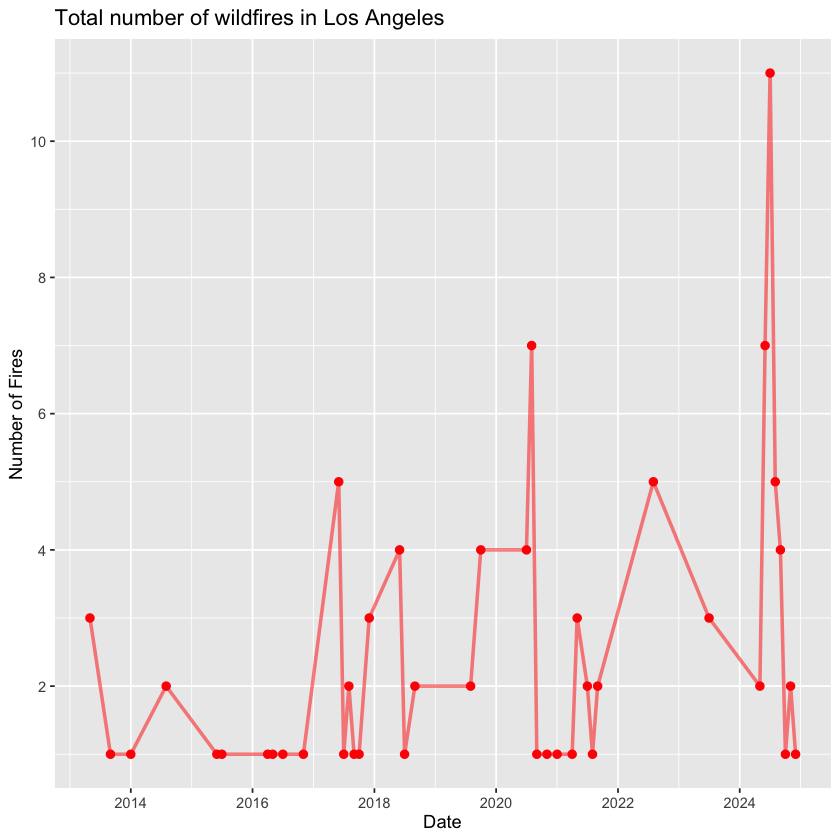

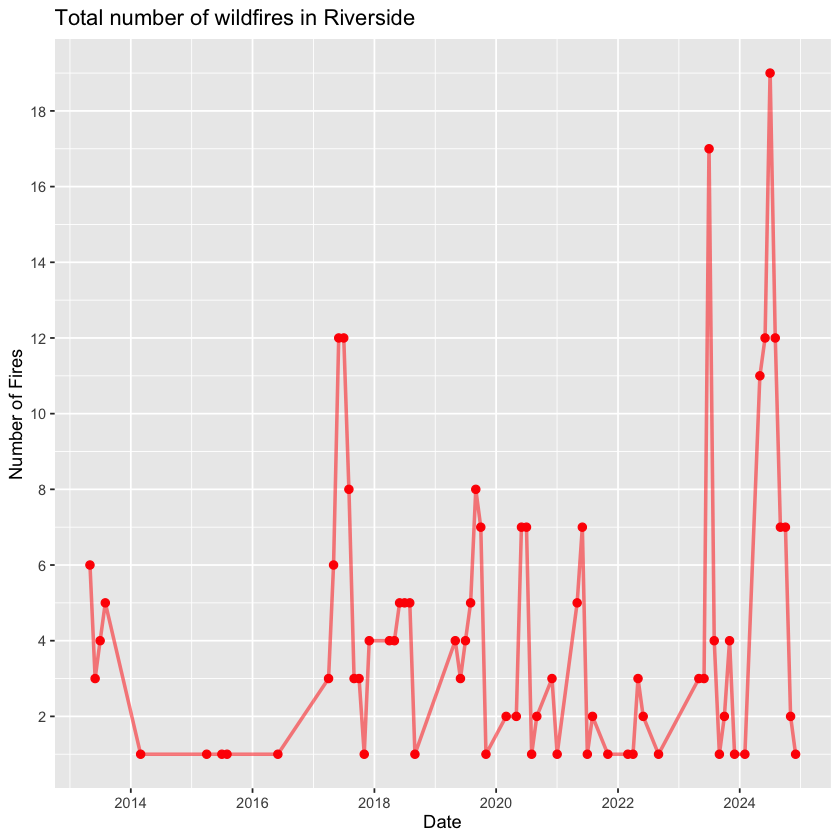

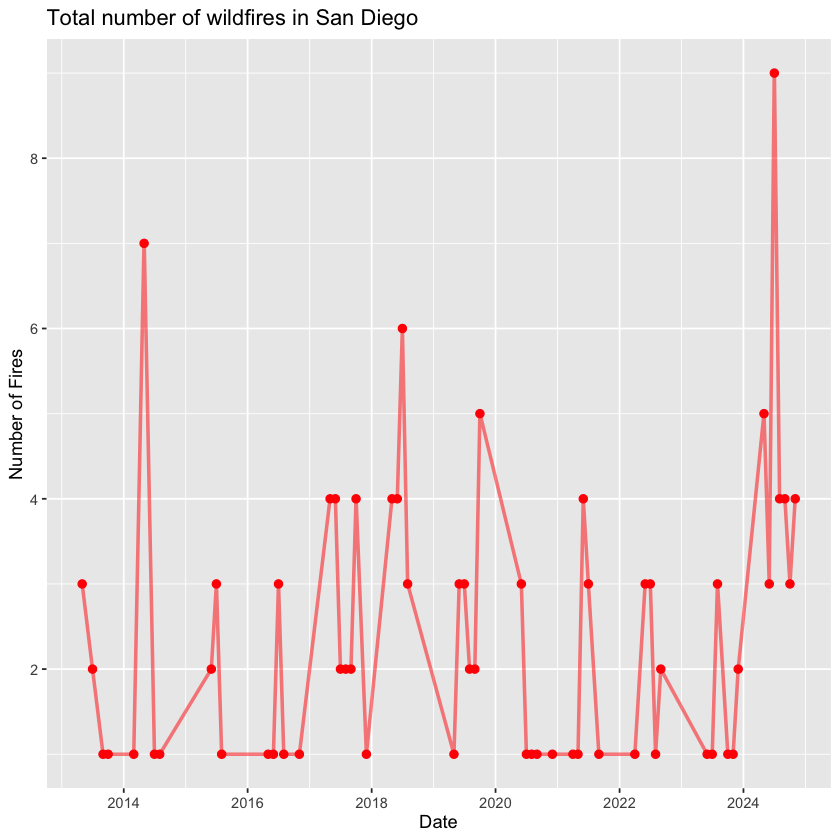

In [12]:
#Number of wildfires in LA
plot <- ggplot(data = merged_data_la,
               mapping = aes(x = Date, y = Fires_Count))
plot + geom_line(color = "red", size = 1, alpha = 0.5) + 
  geom_point(data = merged_data_la,
             aes(x = Date, y = Fires_Count),
             color = "red", size = 2) +
  labs(title = "Total number of wildfires in Los Angeles",
       x = "Date", y = "Number of Fires") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(breaks = seq(0, max(merged_data_la$Fires_Count), by = 2))

#Number of wildfires in Riverside
plot <- ggplot(data = merged_data_riverside,
               mapping = aes(x = Date, y = Fires_Count))
plot + geom_line(color = "red", size = 1, alpha = 0.5) + 
  geom_point(data = merged_data_riverside,
             aes(x = Date, y = Fires_Count),
             color = "red", size = 2) +
  labs(title = "Total number of wildfires in Riverside",
       x = "Date", y = "Number of Fires") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(breaks = seq(0, max(merged_data_riverside$Fires_Count), by = 2))

#Number of wildfires in San Diego
plot <- ggplot(data = merged_data_sd,
               mapping = aes(x = Date, y = Fires_Count))
plot + geom_line(color = "red", size = 1, alpha = 0.5) + 
  geom_point(data = merged_data_sd,
             aes(x = Date, y = Fires_Count),
             color = "red", size = 2) +
  labs(title = "Total number of wildfires in San Diego",
       x = "Date", y = "Number of Fires") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(breaks = seq(0, max(merged_data_sd$Fires_Count), by = 2))


## Create plots showing the total precipitation in each county. Used blue as the color to distinguish from previous plots. The code is the same as the previous graphs from above except I changed the y-axis variable to be precipitation.  



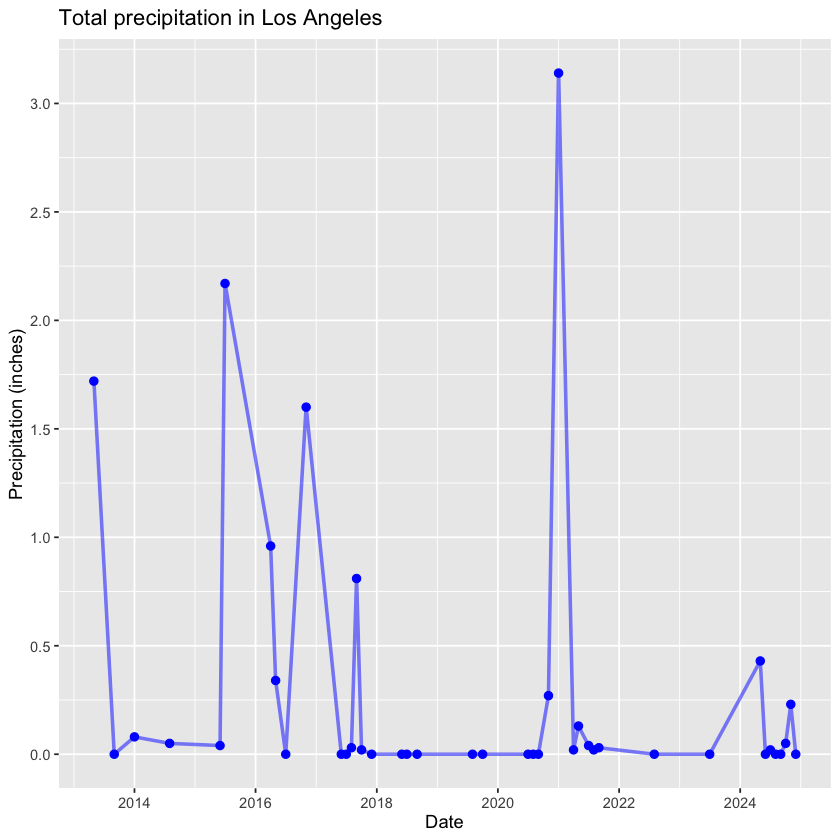

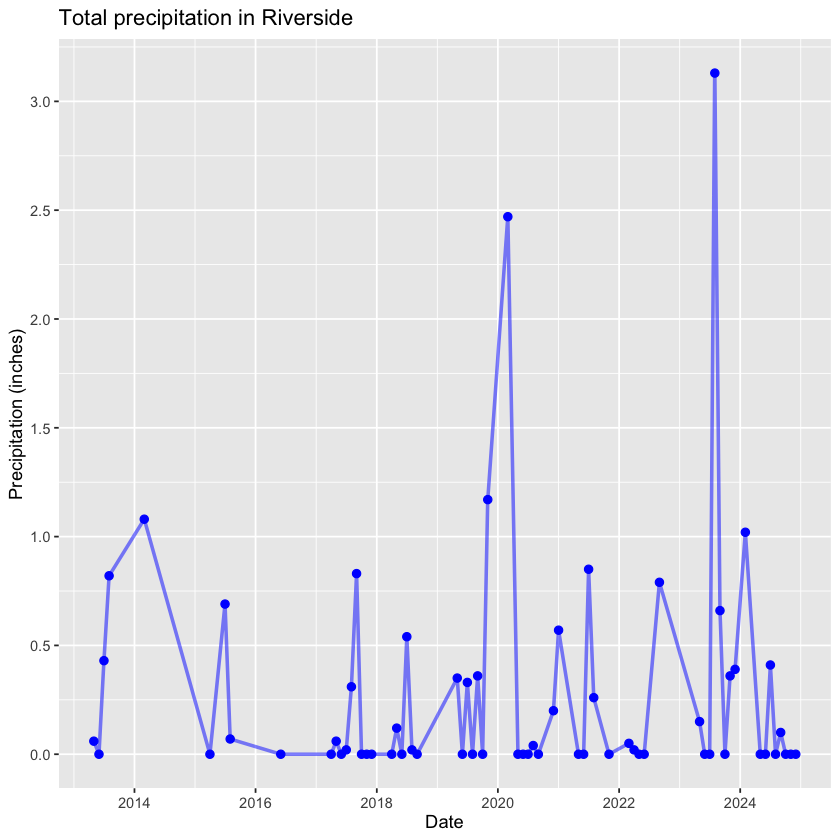

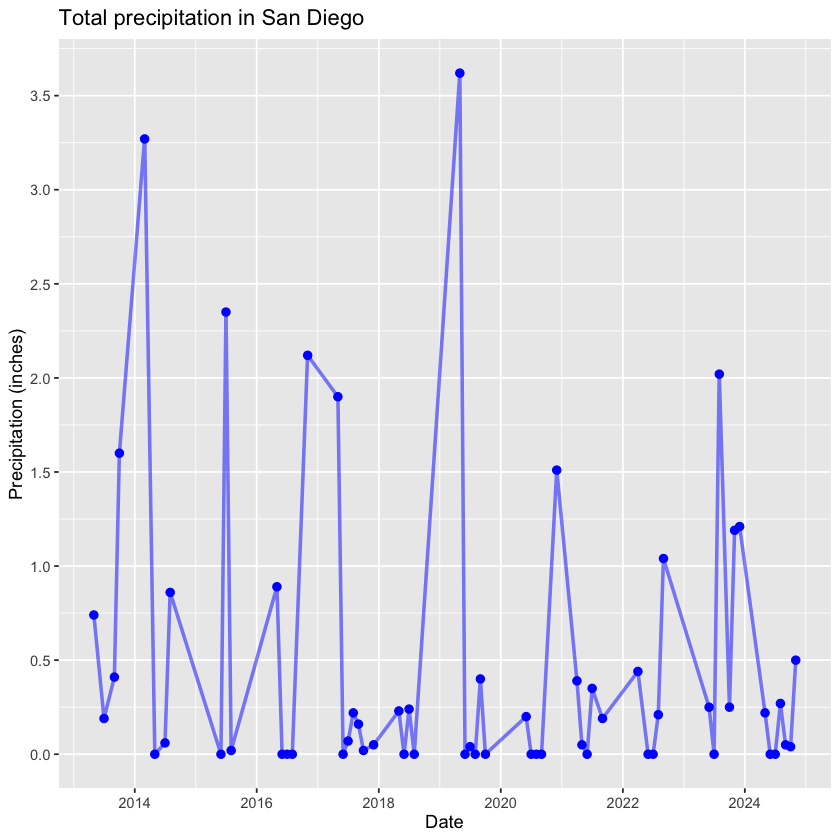

In [13]:
#Precipitation in LA
plot <- ggplot(data = merged_data_la,
               mapping = aes(x = Date, y = Precipitation_Inches))
plot + geom_line(color = "blue", size = 1, alpha = 0.5) + 
  geom_point(data = merged_data_la,
             aes(x = Date, y = Precipitation_Inches),
             color = "blue", size = 2) +
  labs(title = "Total precipitation in Los Angeles",
       x = "Date", y = "Precipitation (inches)") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(breaks = seq(0, max(merged_data_la$Precipitation_Inches), by = 0.5))

#Precipitation in Riverside
plot <- ggplot(data = merged_data_riverside,
               mapping = aes(x = Date, y = Precipitation_Inches))
plot + geom_line(color = "blue", size = 1, alpha = 0.5) + 
  geom_point(data = merged_data_riverside,
             aes(x = Date, y = Precipitation_Inches),
             color = "blue", size = 2) +
  labs(title = "Total precipitation in Riverside",
       x = "Date", y = "Precipitation (inches)") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(breaks = seq(0, max(merged_data_riverside$Precipitation_Inches), by = 0.5))

#Precipitation in San Diego
plot <- ggplot(data = merged_data_sd,
               mapping = aes(x = Date, y = Precipitation_Inches))
plot + geom_line(color = "blue", size = 1, alpha = 0.5) + 
  geom_point(data = merged_data_sd,
             aes(x = Date, y = Precipitation_Inches),
             color = "blue", size = 2) +
  labs(title = "Total precipitation in San Diego",
       x = "Date", y = "Precipitation (inches)") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(breaks = seq(0, max(merged_data_sd$Precipitation_Inches), by = 0.5))


## Create plots showing the average temperature in each county. Used green as the color to distinguish from previous plots. The code is the same as the previous graphs from above except I changed the y-axis variable to be average temperature.  



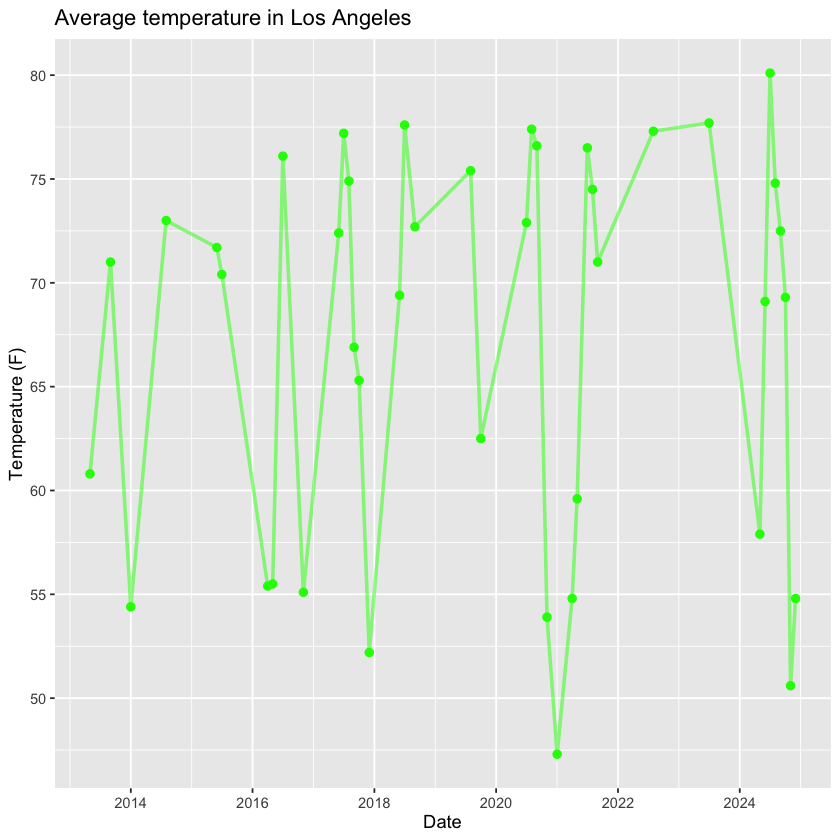

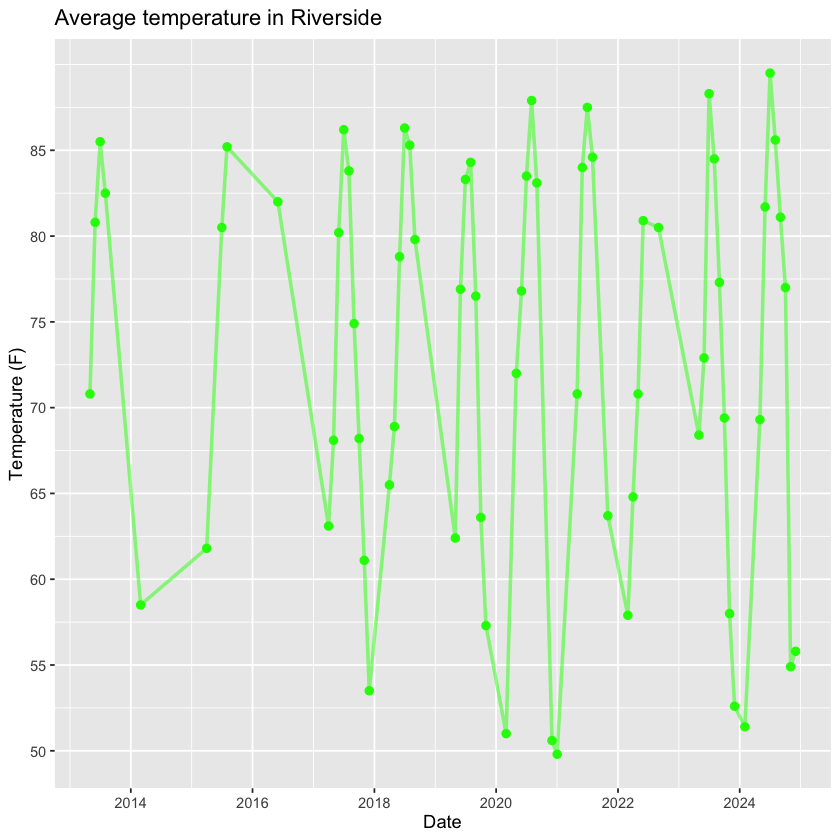

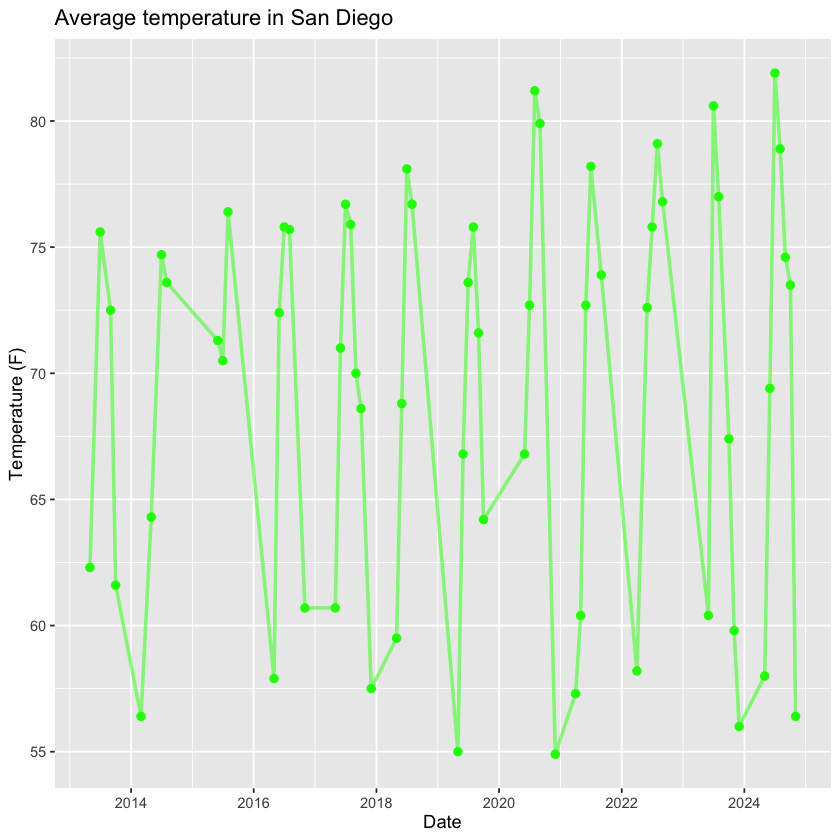

In [14]:
#Average temperature in LA
plot <- ggplot(data = merged_data_la,
               mapping = aes(x = Date, y = Avg_Temperature))
plot + geom_line(color = "green", size = 1, alpha = 0.5) + 
  geom_point(data = merged_data_la,
             aes(x = Date, y = Avg_Temperature),
             color = "green", size = 2) +
  labs(title = "Average temperature in Los Angeles",
       x = "Date", y = "Temperature (F)") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(breaks = seq(0, max(merged_data_la$Avg_Temperature), by = 5))

#Average temperature in Riverside
plot <- ggplot(data = merged_data_riverside,
               mapping = aes(x = Date, y = Avg_Temperature))
plot + geom_line(color = "green", size = 1, alpha = 0.5) + 
  geom_point(data = merged_data_riverside,
             aes(x = Date, y = Avg_Temperature),
             color = "green", size = 2) +
  labs(title = "Average temperature in Riverside",
       x = "Date", y = "Temperature (F)") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(breaks = seq(0, max(merged_data_riverside$Avg_Temperature), by = 5))

#Average temperature in San Diego
plot <- ggplot(data = merged_data_sd,
               mapping = aes(x = Date, y = Avg_Temperature))
plot + geom_line(color = "green", size = 1, alpha = 0.5) + 
  geom_point(data = merged_data_sd,
             aes(x = Date, y = Avg_Temperature),
             color = "green", size = 2) +
  labs(title = "Average temperature in San Diego",
       x = "Date", y = "Temperature (F)") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(breaks = seq(0, max(merged_data_sd$Avg_Temperature), by = 5))


## The original code for using the LOESS model had values below zero, which is not possible so we had to redo these graphs. We did not use these in our final presentation.  



`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


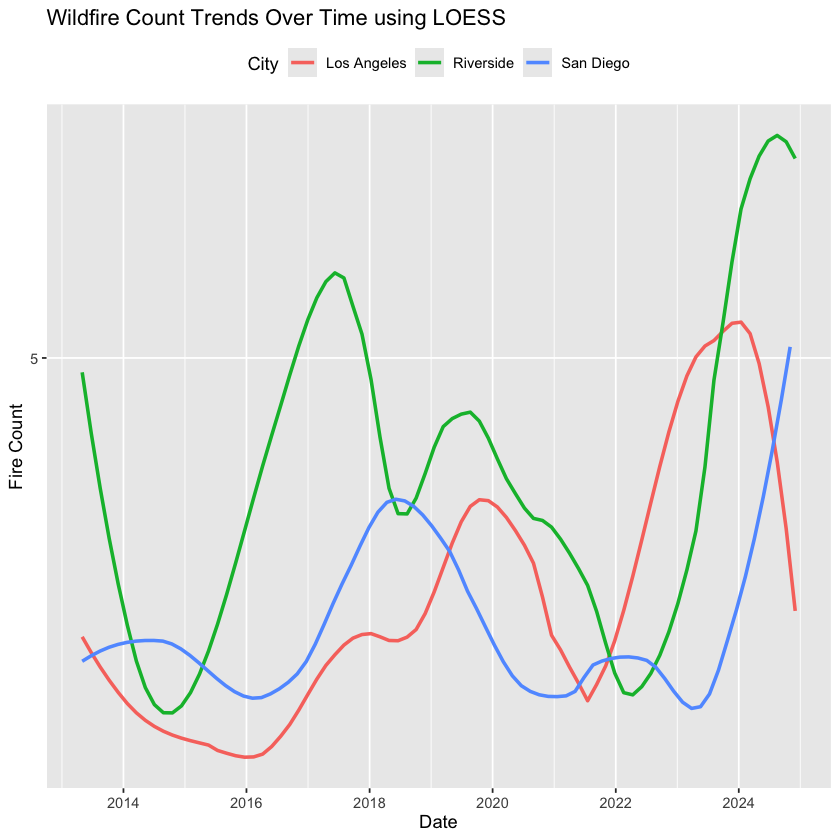

`geom_smooth()` using formula = 'y ~ x'


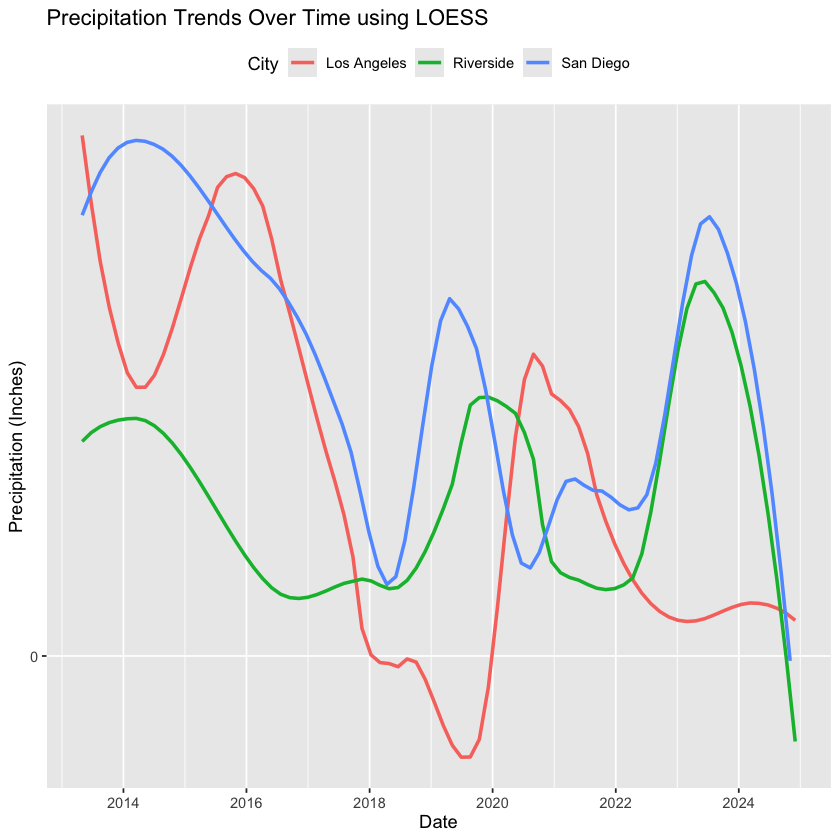

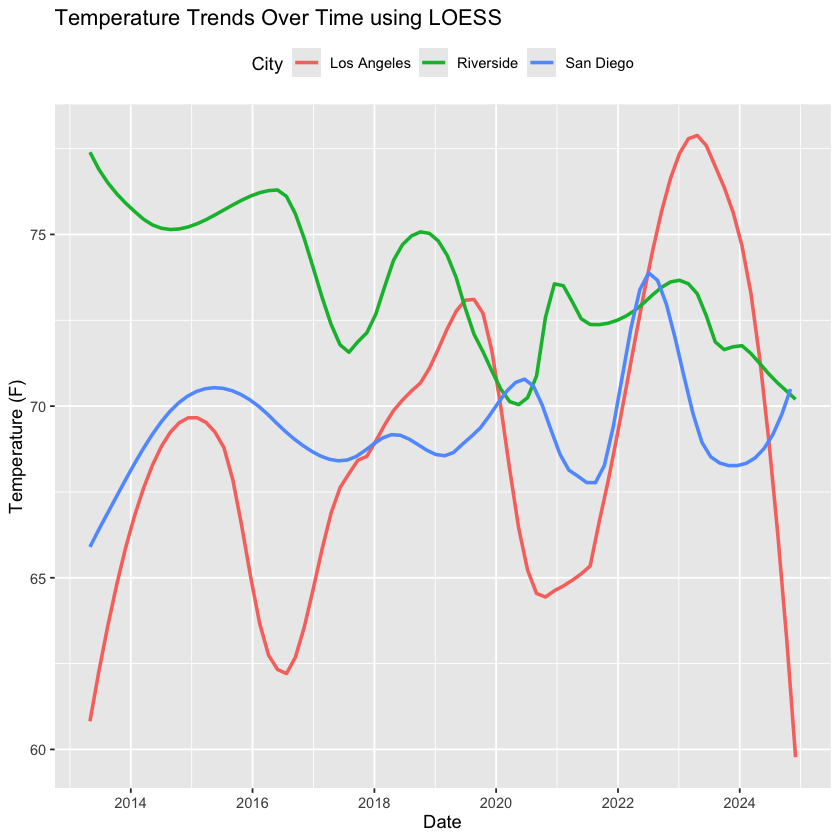

In [15]:
#Combine the data from each county
merged_data_la$City <- "Los Angeles"
merged_data_riverside$City <- "Riverside"
merged_data_sd$City <- "San Diego"
merged_data_all <- bind_rows(merged_data_la, merged_data_riverside, merged_data_sd)

#Original LOESS with wildfire counts
plot <- ggplot(data = merged_data_all, aes(x = Date, y = Fires_Count, color = City)) 
plot + geom_smooth(method = "loess", se = FALSE, size = 1, span = 0.35) + 
  labs(title = "Wildfire Count Trends Over Time using LOESS",
       x = "Date", y = "Fire Count") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(breaks = seq(0, max(merged_data_all$Fires_Count), by = 5)) +
  theme(legend.position = "top")

#Original LOESS with precipitation 
plot <- ggplot(data = merged_data_all, aes(x = Date, y = Precipitation_Inches, color = City)) 
plot + geom_smooth(method = "loess", se = FALSE, size = 1, span = 0.35) +
  labs(title = "Precipitation Trends Over Time using LOESS",
       x = "Date", y = "Precipitation (Inches)") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(breaks = seq(0, max(merged_data_all$Precipitation_Inches), by = 5)) +
  theme(legend.position = "top")

#Original LOESS with average temperature
plot <- ggplot(data = merged_data_all, aes(x = Date, y = Avg_Temperature, color = City))
plot + geom_smooth(method = "loess", se = FALSE, size = 1, span = 0.35) +
  labs(title = "Temperature Trends Over Time using LOESS",
       x = "Date", y = "Temperature (F)") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(breaks = seq(0, max(merged_data_all$Avg_Temperature), by = 5)) +
  theme(legend.position = "top")


## The new version of LOESS graphs prevents negative values and also shows the data points.  



`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 9 rows containing missing values or values outside the scale range
(`geom_smooth()`)."


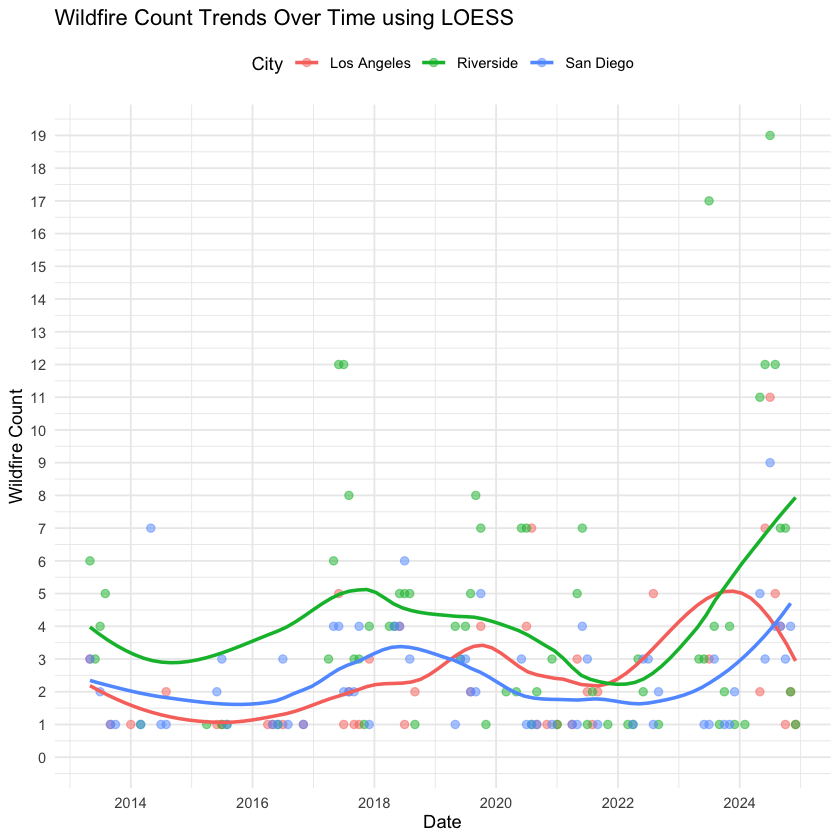

`geom_smooth()` using formula = 'y ~ x'


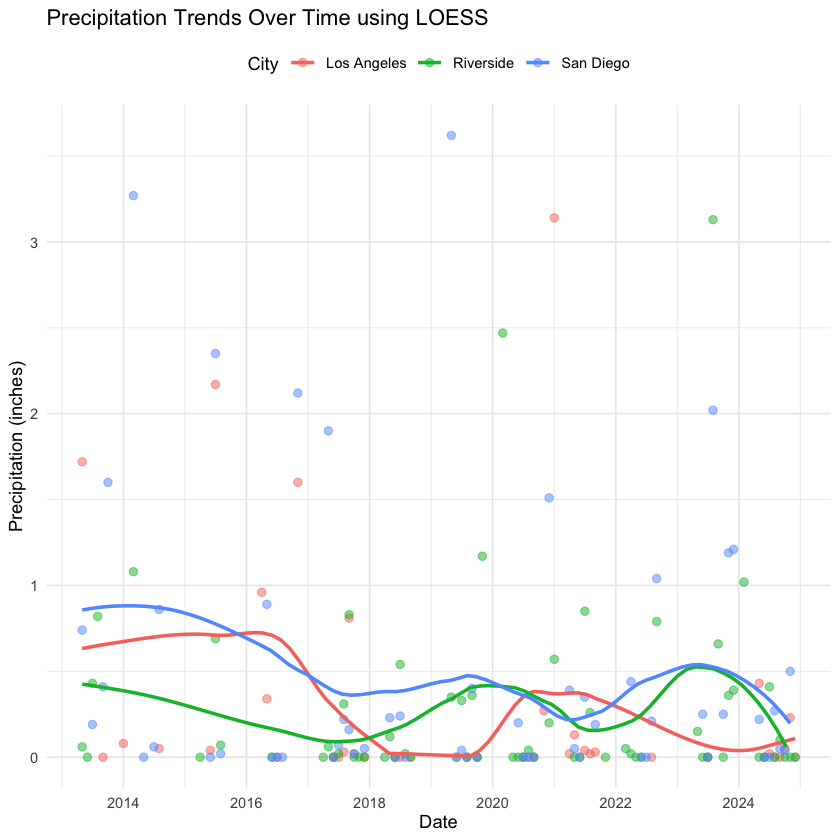

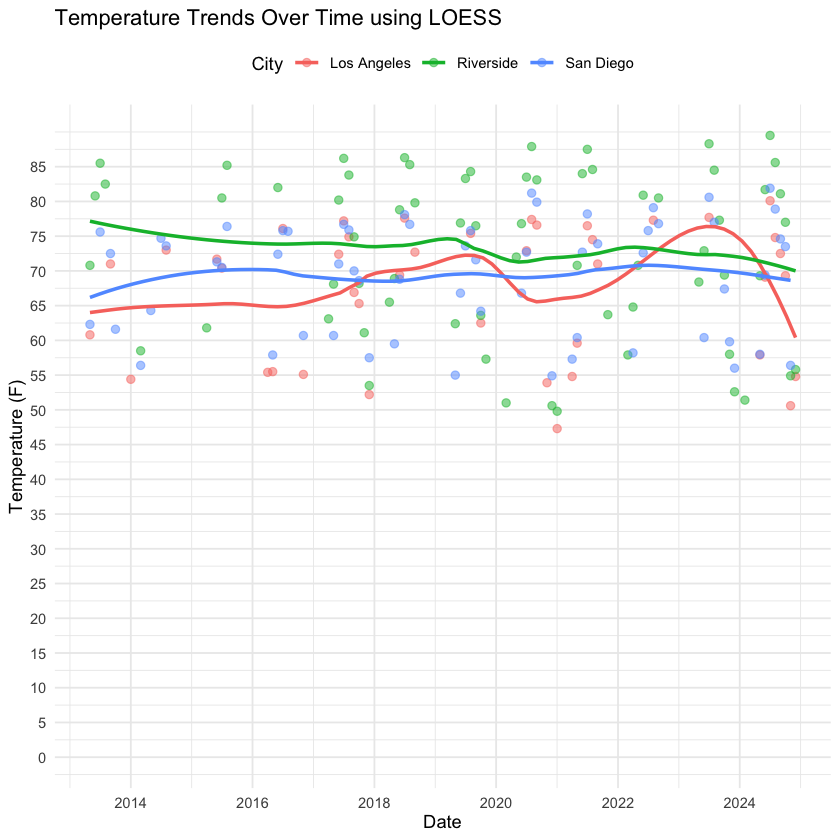

In [16]:
#LOESS of wildfire counts
plot <- ggplot(data = merged_data_all, aes(x = Date, y = Fires_Count, color = City))
#Added points
plot + geom_point(alpha = 0.5, size = 2) +
#LOESS smoothing
  geom_smooth(method = "loess", se = FALSE, size = 1, span = 0.5) + 
  labs(title = "Wildfire Count Trends Over Time using LOESS",
       x = "Date", y = "Wildfire Count") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
#Prevents negative values
  scale_y_continuous(limits = c(0, max(merged_data_all$Fires_Count, na.rm = TRUE)), 
                     breaks = seq(0, max(merged_data_all$Fires_Count, na.rm = TRUE), by = 1)) +
  theme_minimal() +
  theme(legend.position = "top")

#LOESS of precipitation
plot <- ggplot(data = merged_data_all, aes(x = Date, y = Precipitation_Inches, color = City))
plot + geom_point(alpha = 0.5, size = 2) +
  geom_smooth(method = "loess", se = FALSE, size = 1, span = 0.5) +
  labs(title = "Precipitation Trends Over Time using LOESS",
       x = "Date", y = "Precipitation (inches)") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(limits = c(0, max(merged_data_all$Precipitation_Inches, na.rm = TRUE)), 
                     breaks = seq(0, max(merged_data_all$Precipitation_Inches, na.rm = TRUE), by = 1)) +
  theme_minimal() +
  theme(legend.position = "top")

#LOESS of average temperature
plot <- ggplot(data = merged_data_all, aes(x = Date, y = Avg_Temperature, color = City))
plot + geom_point(alpha = 0.5, size = 2) + 
  geom_smooth(method = "loess", se = FALSE, size = 1, span = 0.5) + 
  labs(title = "Temperature Trends Over Time using LOESS",
       x = "Date", y = "Temperature (F)") +
  scale_x_date(date_labels = "%Y", date_breaks = "2 years") +
  scale_y_continuous(limits = c(0, max(merged_data_all$Avg_Temperature, na.rm = TRUE)), 
                     breaks = seq(0, max(merged_data_all$Avg_Temperature, na.rm = TRUE), by = 5)) +
  theme_minimal() +
  theme(legend.position = "top")
